 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns
whale_path = Path('./Resources/whale_returns.csv')
whale_df = pd.read_csv(whale_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_df = whale_df.sort_index()
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_df = whale_df.dropna()
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo_path = Path('./Resources/algo_returns.csv')
algo_df = pd.read_csv(algo_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_df = algo_df.sort_index()
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_df = algo_df.dropna()
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P 500 Closing Prices
sp500_path = Path('./Resources/sp500_history.csv')
sp500_df = pd.read_csv(sp500_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_df = sp500_df.sort_index()
sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [10]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types
sp500_df['Close'] = sp500_df['Close'].str.replace('$', '').astype(float)
sp500_df

<ipython-input-11-475930e11eb5>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500_df['Close'] = sp500_df['Close'].str.replace('$', '').astype(float)


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [12]:
# Calculate Daily Returns
daily_sp500 = sp500_df.pct_change()
daily_sp500.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [13]:
# Drop nulls
daily_sp500.dropna(inplace=True)
daily_sp500.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [14]:
# Rename `Close` Column to be specific to this portfolio.
daily_sp500.columns = ["SP_500"]
daily_sp500.head()

,SP_500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
daily_returns_df = pd.concat([whale_df, algo_df, daily_sp500], axis="columns", join="inner")
daily_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

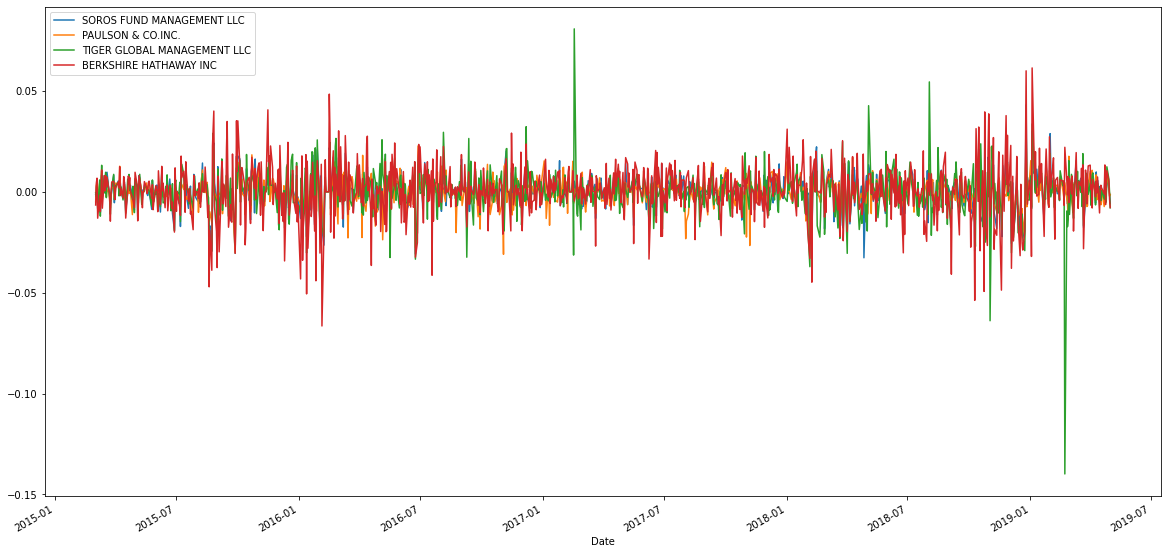

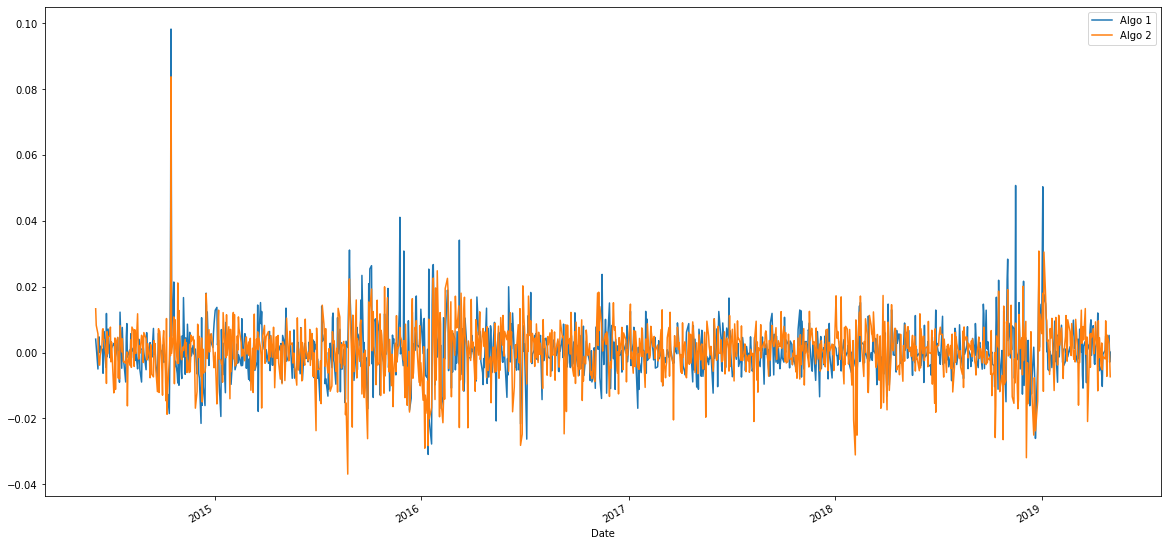

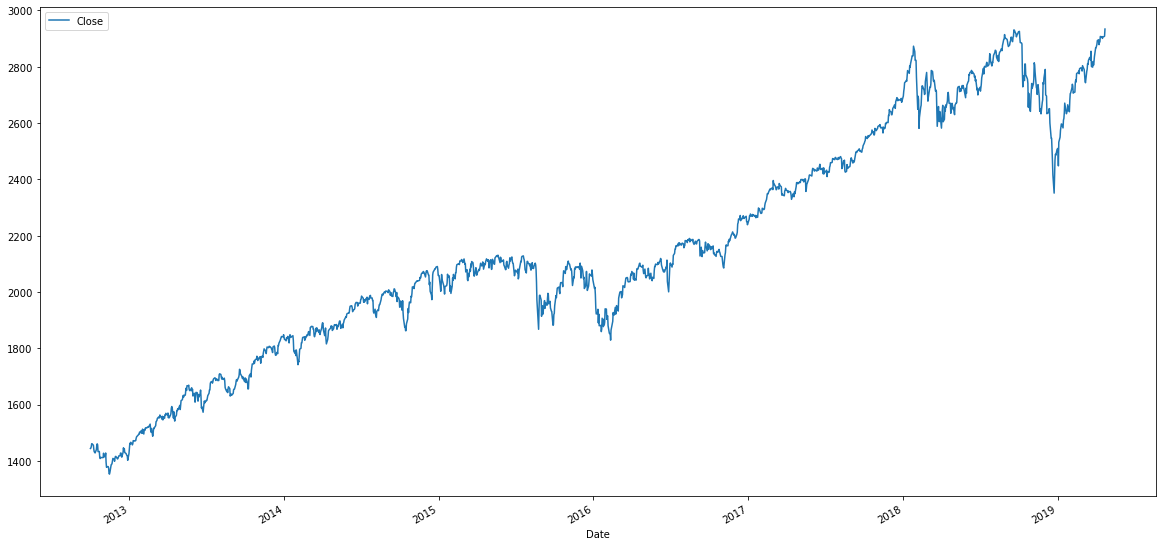

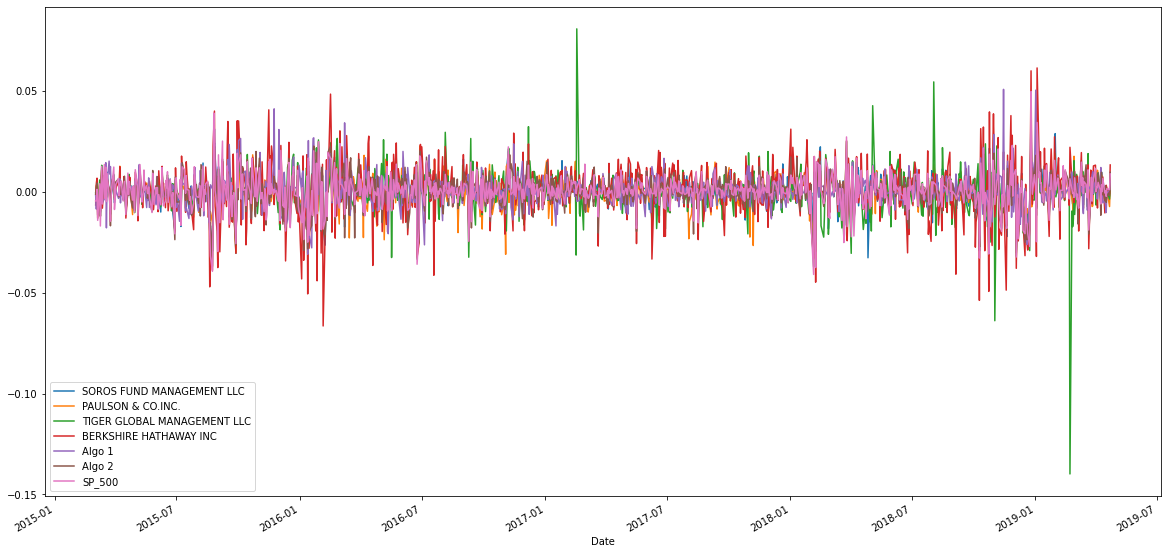

In [16]:
# Plot daily returns of all portfolios
whale_df.plot(figsize=(20, 10))
algo_df.plot(figsize=(20, 10))
sp500_df.plot(figsize=(20, 10))
daily_returns_df.plot(figsize=(20, 10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

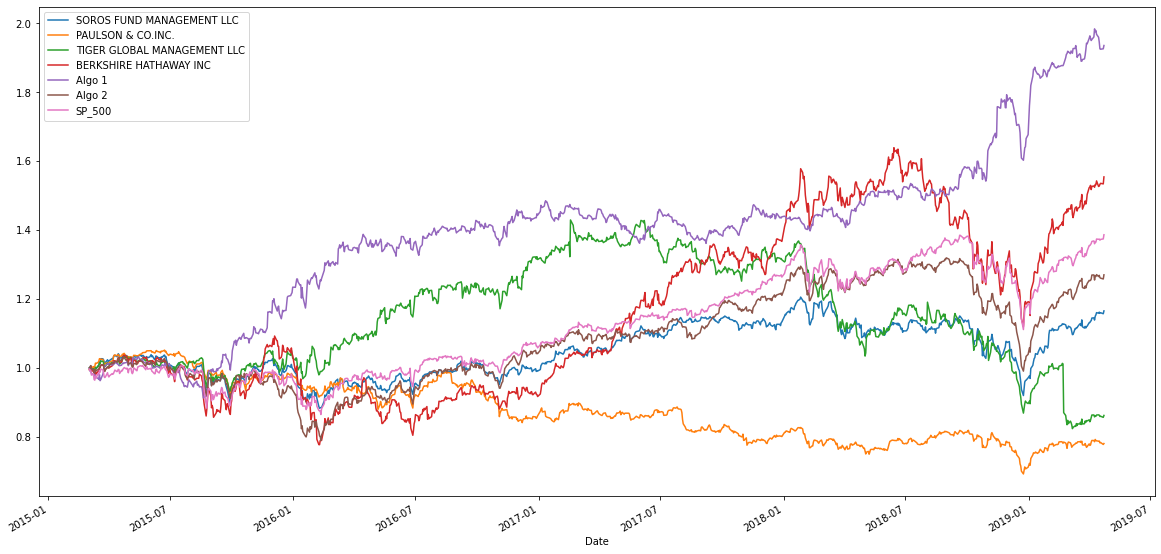

In [17]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + daily_returns_df).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize=(20, 10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

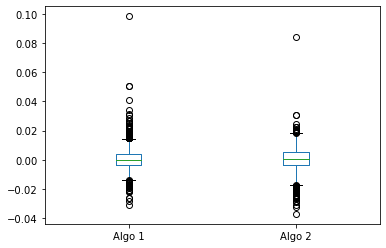

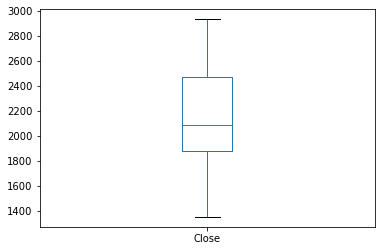

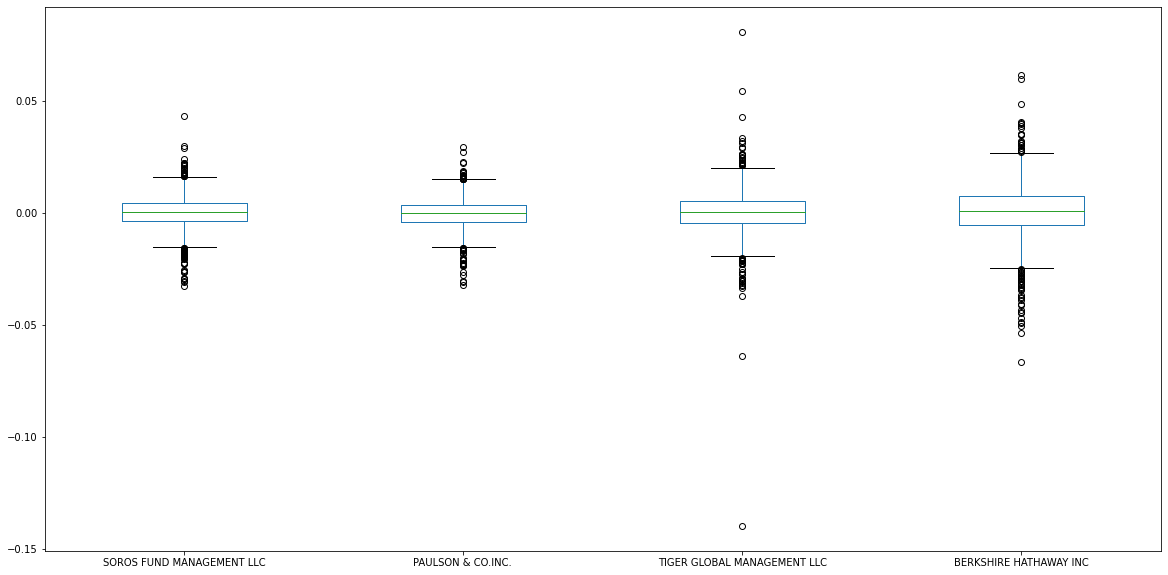

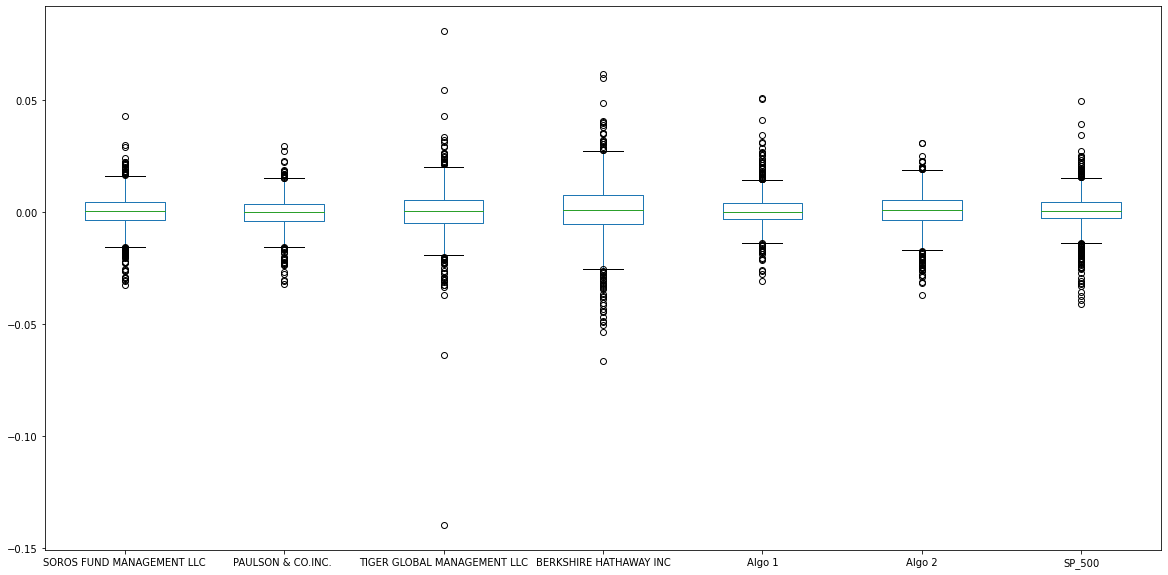

In [18]:
# Box plot to visually show risk
algo_df.plot.box()
sp500_df.plot.box()
whale_df.plot(kind = 'box', figsize=(20,10))
daily_returns_df.plot(kind = 'box', figsize=(20,10))

### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
daily_std = daily_returns_df.std()
daily_std = pd.DataFrame(daily_std)
daily_std

,0
SOROS FUND MANAGEMENT LLC,0.007895
PAULSON & CO.INC.,0.007023
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919
Algo 1,0.007620
Algo 2,0.008342
SP_500,0.008554


### Determine which portfolios are riskier than the S&P 500

In [20]:
# Calculate  the daily standard deviation of S&P 500

# Determine which portfolios are riskier than the S&P 500
risky_std= daily_std > daily_std[0][0]
risky_std

,0
SOROS FUND MANAGEMENT LLC,False
PAULSON & CO.INC.,False
TIGER GLOBAL MANAGEMENT LLC,True
BERKSHIRE HATHAWAY INC,True
Algo 1,False
Algo 2,True
SP_500,True


### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std

,0
SOROS FUND MANAGEMENT LLC,0.125335
PAULSON & CO.INC.,0.111488
TIGER GLOBAL MANAGEMENT LLC,0.172936
BERKSHIRE HATHAWAY INC,0.205077
Algo 1,0.120967
Algo 2,0.132430
SP_500,0.135786


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

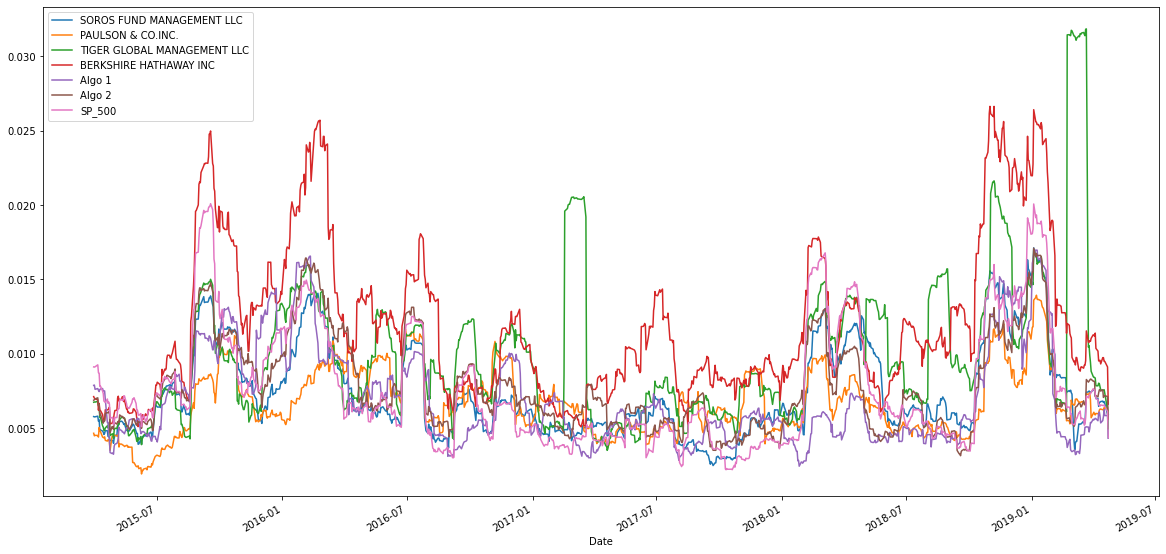

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = daily_returns_df.rolling(window=21).std()

# Plot the rolling standard deviation
rolling_std.plot(figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

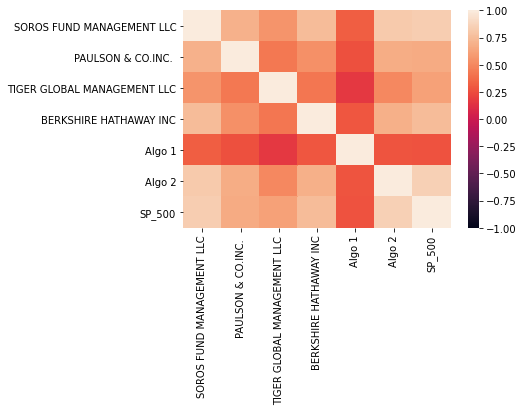

In [23]:
# Calculate the correlation
correlation_df = daily_returns_df.corr()
# Display de correlation matrix
sns.heatmap(correlation_df, vmin=-1, vmax=+1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 60 Day Beta of SOROS FUND MANAGEMENT LLC'}, xlabel='Date'>

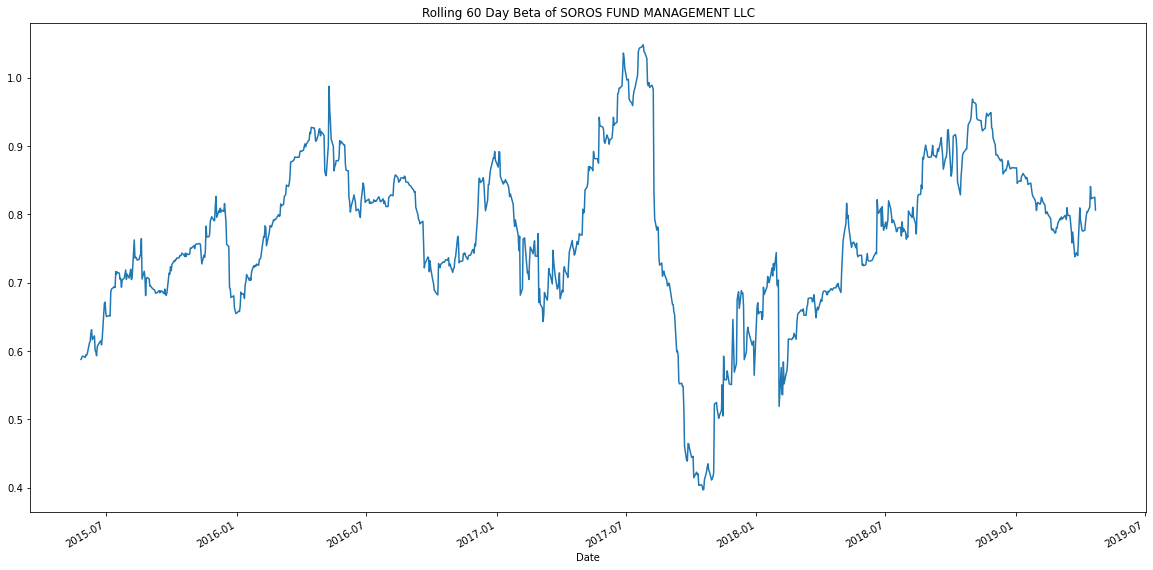

In [24]:
# Calculate covariance of a single portfolio
rolling_covariance = daily_returns_df['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(daily_returns_df['SP_500'])
rolling_covariance
# Calculate variance of S&P 500
rolling_variance = daily_returns_df['SP_500'].rolling(window=60).var()
rolling_variance
# Computing beta
beta = rolling_covariance / rolling_variance
beta
# Plot beta trend
beta.plot(figsize=(20,10), title="Rolling 60 Day Beta of SOROS FUND MANAGEMENT LLC")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':' Exponentially Weighted Average'}, xlabel='Date'>

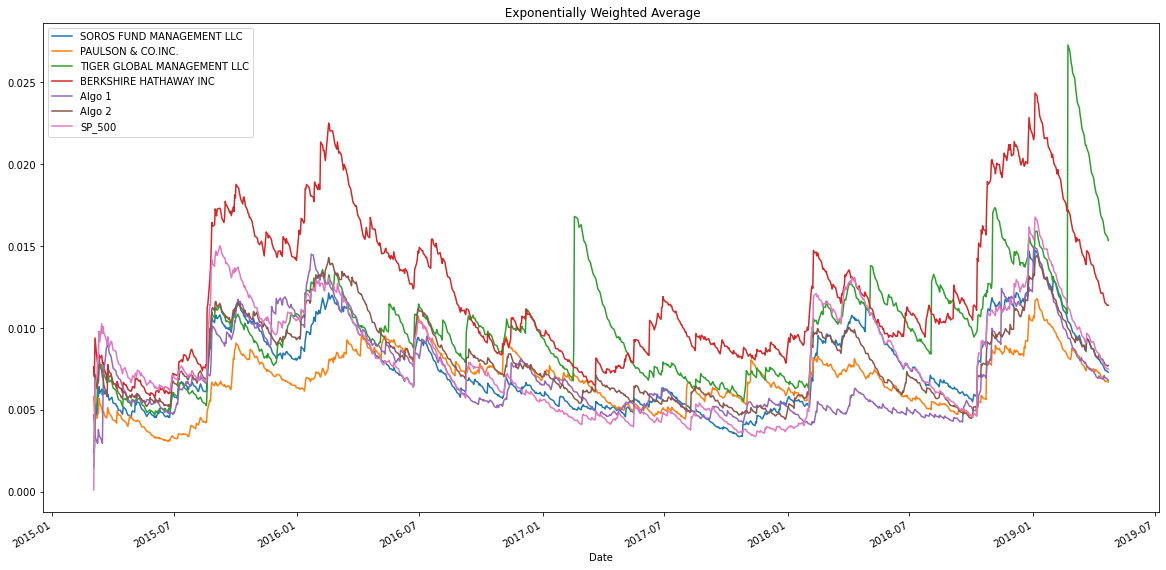

In [25]:
# Use `ewm` to calculate the rolling window
daily_returns_df.ewm(halflife=21).std().plot(figsize=(20, 10), title=" Exponentially Weighted Average")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [26]:
# Annualized Sharpe Ratios
sharpe_ratios = (daily_returns_df.mean() * 252) / (daily_returns_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
SP_500                         0.648267
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

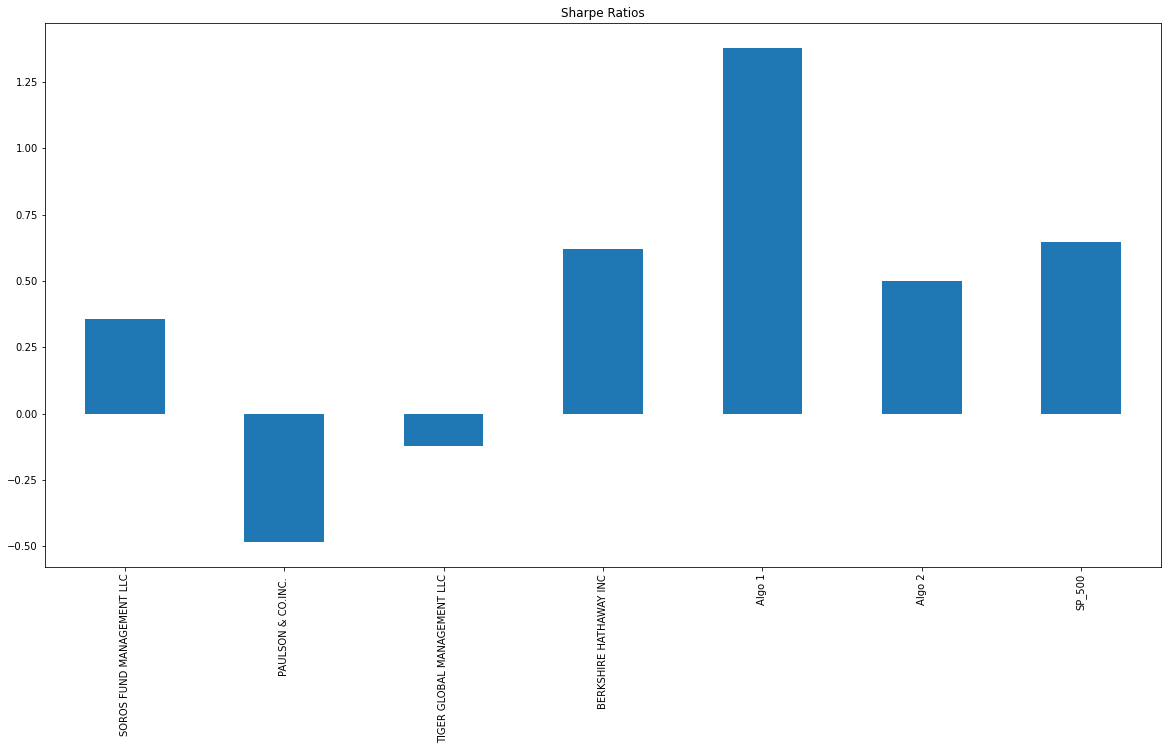

In [27]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", figsize=(20,10), title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algo 1 and Algo 2 both outperformed the S&P 500, however Algo 2 did not outperform Berkshire Hathaway Inc.'s portfolio.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [39]:
# Reading data from 1st stock
goog_path = Path("./Resources/goog_new.csv")
goog_df = pd.read_csv(goog_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
goog_df.head()

,Close
Date,
2016-01-04,741.84
2016-01-05,742.58
2016-01-06,743.62
2016-01-07,726.39
2016-01-08,714.47


In [40]:
# Reading data from 2nd stock
aapl_path = Path("./Resources/aapl_new.csv")
aapl_df = pd.read_csv(aapl_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
aapl_df.head()

,Close
Date,
2016-01-04,26.34
2016-01-05,25.68
2016-01-06,25.18
2016-01-07,24.11
2016-01-08,24.24


In [41]:
# Reading data from 3rd stock
cost_path = Path("./Resources/cost_new.csv")
cost_df = pd.read_csv(cost_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
cost_df.head()

,Close
Date,
2015-01-02,141.61
2015-01-05,140.00
2015-01-06,141.85
2015-01-07,144.32
2015-01-08,145.56


In [42]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat([goog_df, aapl_df, cost_df], axis="columns", join="inner")
combined_df

,Close,Close,Close
Date,,,
2016-01-04,741.84,26.34,159.54
2016-01-05,742.58,25.68,159.93
2016-01-06,743.62,25.18,158.45
2016-01-07,726.39,24.11,154.82
2016-01-08,714.47,24.24,152.11
...,...,...,...
2020-12-23,1732.38,130.96,361.89
2020-12-24,1738.85,131.97,364.58
2020-12-28,1776.09,136.69,371.06


In [43]:
# Reset Date index
combined_df.reset_index()
combined_df.head()

,Close,Close,Close
Date,,,
2016-01-04,741.84,26.34,159.54
2016-01-05,742.58,25.68,159.93
2016-01-06,743.62,25.18,158.45
2016-01-07,726.39,24.11,154.82
2016-01-08,714.47,24.24,152.11


In [44]:
# Reorganize portfolio data by having a column per symbol
combined_df.columns = ["GOOG", "AAPL","COST"]
combined_df = combined_df.sort_index()
combined_df.head()

,GOOG,AAPL,COST
Date,,,
2016-01-04,741.84,26.34,159.54
2016-01-05,742.58,25.68,159.93
2016-01-06,743.62,25.18,158.45
2016-01-07,726.39,24.11,154.82
2016-01-08,714.47,24.24,152.11


In [45]:
# Calculate daily returns
daily_returns_pt2 = combined_df.pct_change()
# Drop NAs
daily_returns_pt2 = daily_returns_pt2.dropna()
# Display sample data
daily_returns_pt2.head()

,GOOG,AAPL,COST
Date,,,
2016-01-05,0.000998,-0.025057,0.002445
2016-01-06,0.001401,-0.019470,-0.009254
2016-01-07,-0.023170,-0.042494,-0.022909
2016-01-08,-0.016410,0.005392,-0.017504
2016-01-11,0.002183,0.016089,0.017159


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [46]:
# Set weights
weights = [.33, .33, .33]

# Calculate portfolio return
portfolio_weighted_returns = daily_returns_pt2.dot(weights)
# Display sample data
portfolio_weighted_returns.head()

Date
2016-01-05   -0.007133
2016-01-06   -0.009017
2016-01-07   -0.029229
2016-01-08   -0.009412
2016-01-11    0.011692
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [47]:
# Join your returns DataFrame to the original returns DataFrame
combined_returns = pd.concat([daily_returns_df, daily_returns_pt2], axis='columns', join='inner')
# combined_returns = combined_returns.reset_index()
combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_500,GOOG,AAPL,COST
Date,,,,,,,,,,
2016-01-05,-0.000398,0.002242,0.006798,-0.002960,0.009160,0.001770,0.002012,0.000998,-0.025057,0.002445
2016-01-06,-0.011558,-0.006955,-0.003349,0.017758,0.010346,-0.015503,-0.013115,0.001401,-0.019470,-0.009254
2016-01-07,-0.020495,-0.007167,-0.021324,-0.033944,-0.000081,-0.029061,-0.023700,-0.023170,-0.042494,-0.022909
2016-01-08,-0.008149,-0.008307,-0.010071,-0.017585,-0.006897,-0.012941,-0.010838,-0.016410,0.005392,-0.017504
2016-01-11,-0.005272,-0.001480,0.011699,-0.003927,-0.007627,-0.018451,0.000853,0.002183,0.016089,0.017159


In [48]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_returns = combined_returns.dropna()
combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_500,GOOG,AAPL,COST
Date,,,,,,,,,,
2016-01-05,-0.000398,0.002242,0.006798,-0.002960,0.009160,0.001770,0.002012,0.000998,-0.025057,0.002445
2016-01-06,-0.011558,-0.006955,-0.003349,0.017758,0.010346,-0.015503,-0.013115,0.001401,-0.019470,-0.009254
2016-01-07,-0.020495,-0.007167,-0.021324,-0.033944,-0.000081,-0.029061,-0.023700,-0.023170,-0.042494,-0.022909
2016-01-08,-0.008149,-0.008307,-0.010071,-0.017585,-0.006897,-0.012941,-0.010838,-0.016410,0.005392,-0.017504
2016-01-11,-0.005272,-0.001480,0.011699,-0.003927,-0.007627,-0.018451,0.000853,0.002183,0.016089,0.017159


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [50]:
# Calculate the annualized `std`
combined_annualized_std = combined_returns.std() * np.sqrt(252)
combined_annualized_std

SOROS FUND MANAGEMENT LLC      0.125149
PAULSON & CO.INC.              0.115473
TIGER GLOBAL MANAGEMENT LLC    0.181669
BERKSHIRE HATHAWAY INC         0.204841
Algo 1                         0.115230
Algo 2                         0.130965
SP_500                         0.129422
GOOG                           0.217925
AAPL                           0.243527
COST                           0.195457
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling STD of All Portfolios'}, xlabel='Date'>

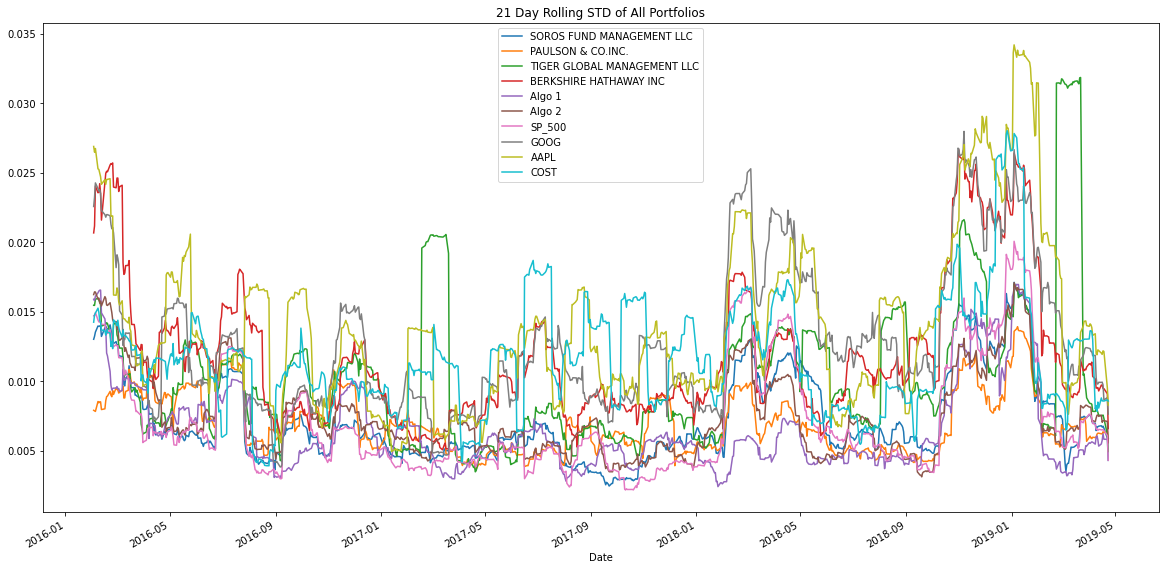

In [51]:
# Calculate rolling standard deviation
combined_21day = combined_returns.rolling(window=21).std().dropna()
# Plot rolling standard deviation
combined_21day.plot(figsize=(20,10), title="21 Day Rolling STD of All Portfolios")

### Calculate and plot the correlation

<AxesSubplot:>

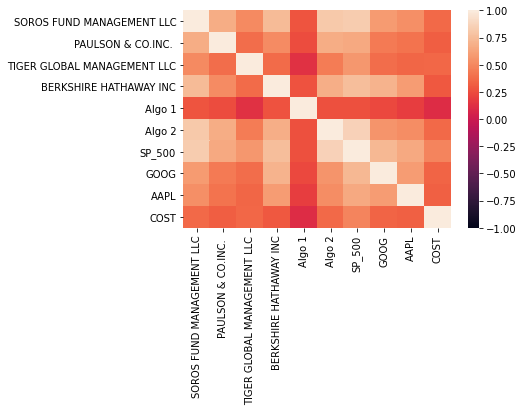

In [56]:
# Calculate and plot the correlation
combined_corr = combined_returns.corr()
sns.heatmap(combined_corr, vmin=-1, vmax=+1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

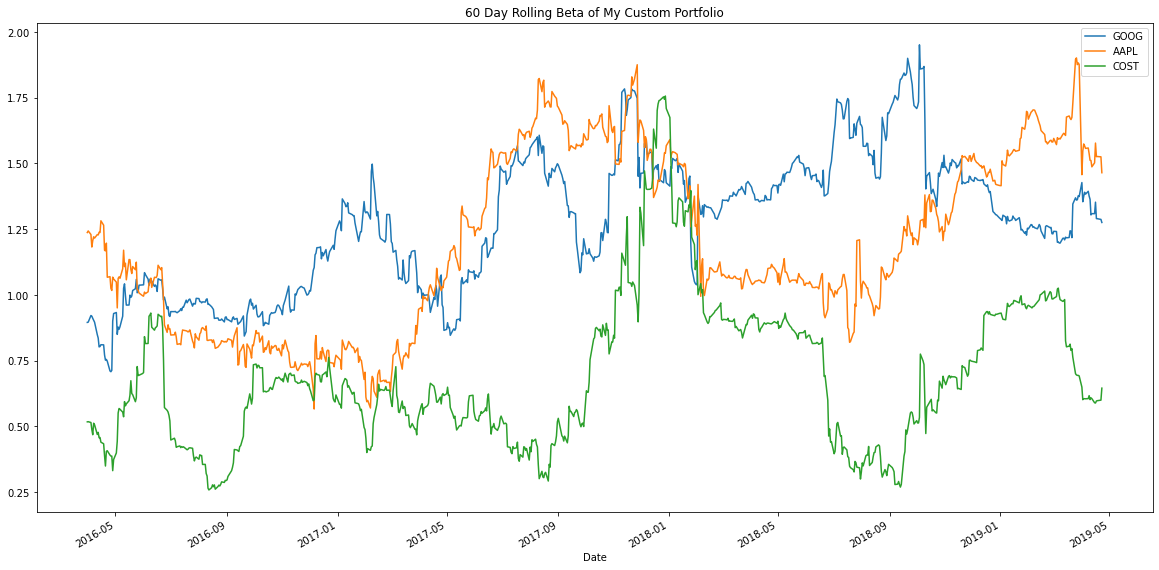

In [64]:
# Calculate and plot Beta
rolling_goog = combined_returns['GOOG'].rolling(window=60).cov(combined_returns['SP_500'])
rolling_aapl = combined_returns['AAPL'].rolling(window=60).cov(combined_returns['SP_500'])
rolling_cost = combined_returns['COST'].rolling(window=60).cov(combined_returns['SP_500'])

rolling_goog_beta = rolling_goog / rolling_variance
rolling_aapl_beta = rolling_aapl / rolling_variance
rolling_cost_beta = rolling_cost / rolling_variance

ax = rolling_goog_beta.plot(figsize=(20,10), title="60 Day Rolling Beta of My Custom Portfolio")
rolling_aapl_beta.plot(ax=ax)
rolling_cost_beta.plot(ax=ax)
ax.legend(["GOOG", "AAPL", "COST"])

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [67]:
# Calculate Annualzied Sharpe Ratios
custom_sharpe = (combined_returns.mean() * 252) / (combined_returns.std() * np.sqrt(252))

<AxesSubplot:title={'center':'Sharpe Ratios of All Portfolios'}>

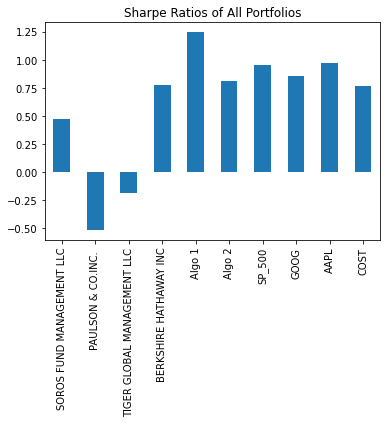

In [68]:
# Visualize the sharpe ratios as a bar plot
custom_sharpe.plot(kind = 'bar', title = "Sharpe Ratios of All Portfolios")

### How does your portfolio do?

My portfolio looks really good especially compared to the whales.